Step 1: Data Loading
Dataset loaded successfully.
Shape of data: (1000, 19)

Step 2: Data Exploration & Understanding
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type       

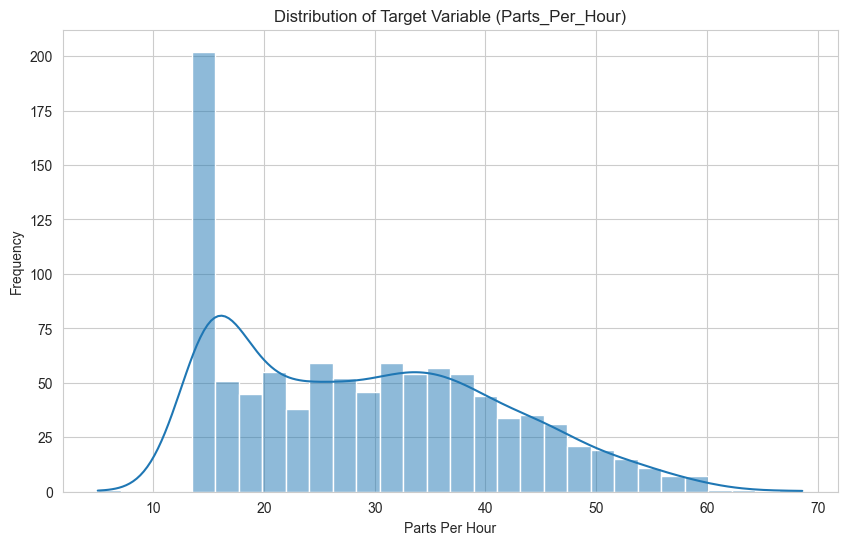

Saved 'eda_target_distribution.png'


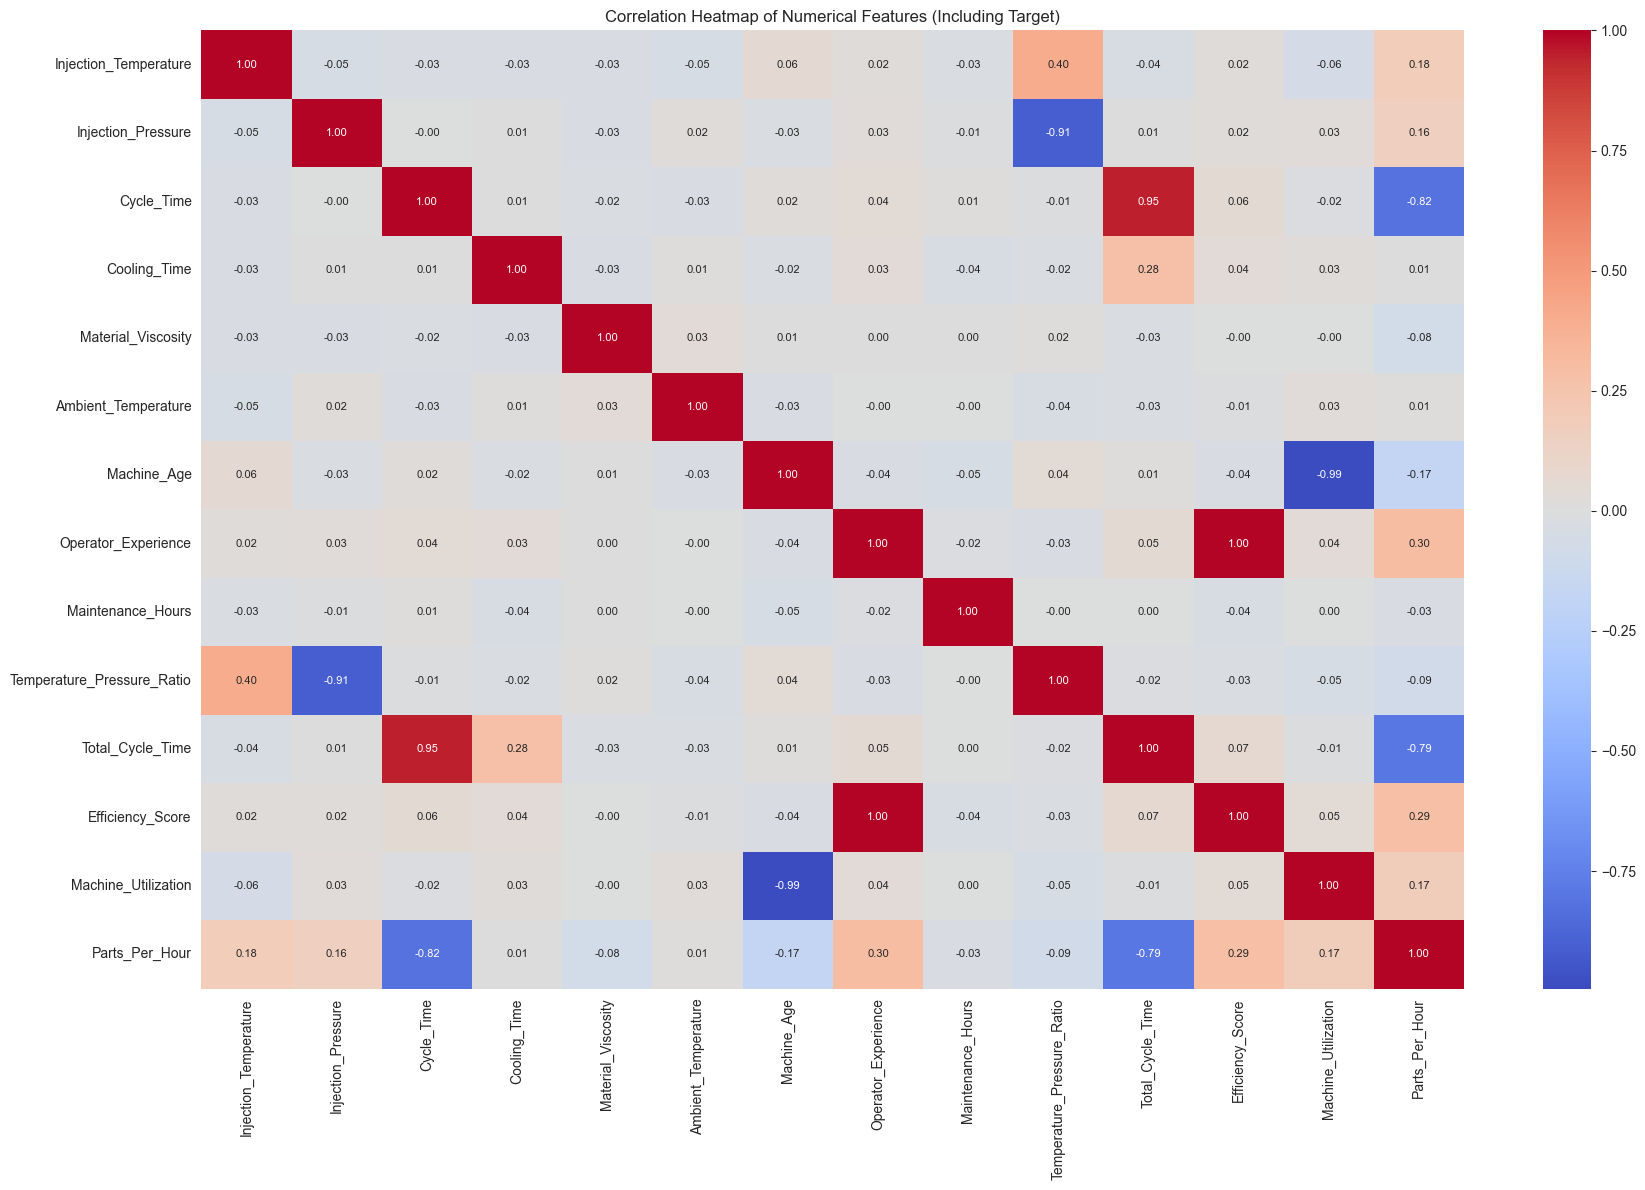

Saved 'eda_correlation_heatmap.png'


<Figure size 640x480 with 0 Axes>

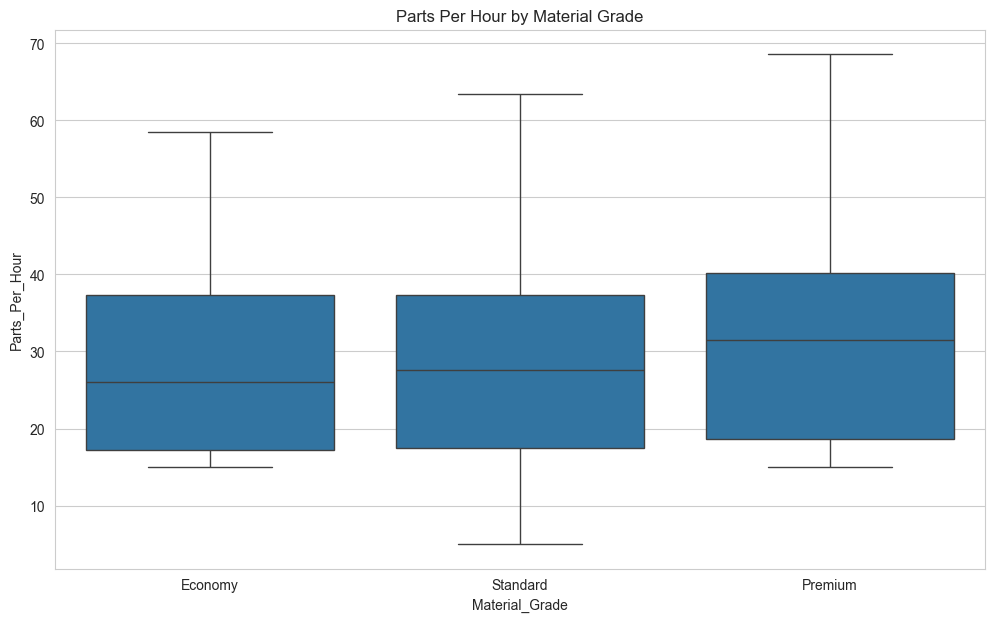

Saved 'eda_boxplot_material_grade.png'


<Figure size 640x480 with 0 Axes>

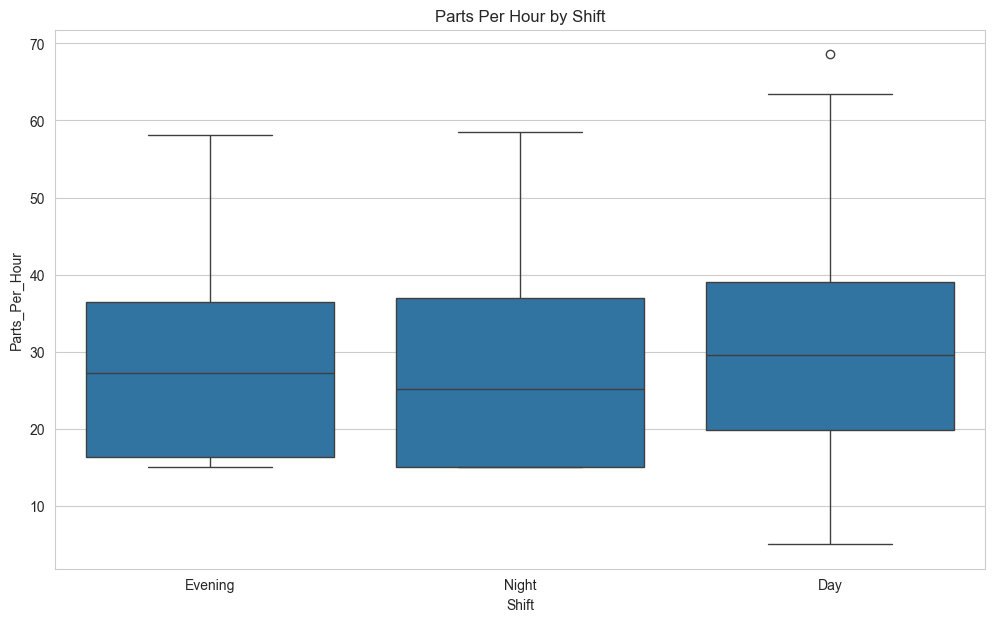

Saved 'eda_boxplot_shift.png'
EDA visualizations saved to disk.

Step 4: Preprocessing & Feature Definition
Target variable: Parts_Per_Hour
Total features: 17
Numerical features (13): ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization']
Categorical features (4): ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']

Step 5: Train-Test Split
Training set size: 800 samples
Test set size: 200 samples

Step 6: Model Building & Training
Training the Linear Regression model...
Model training complete.

Step 7: Model Evaluation

7a. Regression Performance Metrics
These metrics directly evaluate how close the predicted number is to the actual number.
  Mean Squared Error (MSE):      12.3045
  Root Mean Squared Error (RMSE):3.5078
  Mean Absolute Error (MAE):     2.7172
 

<Figure size 640x480 with 0 Axes>

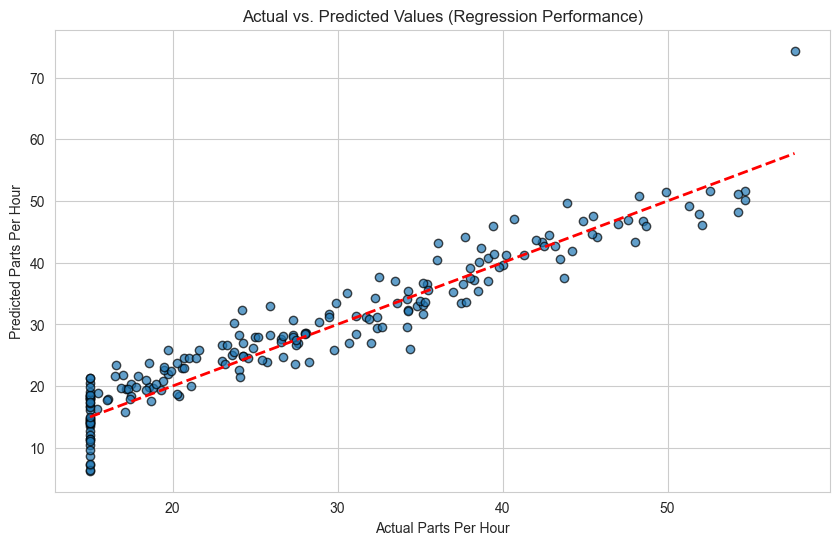

Saved 'eval_actual_vs_predicted.png'


<Figure size 640x480 with 0 Axes>

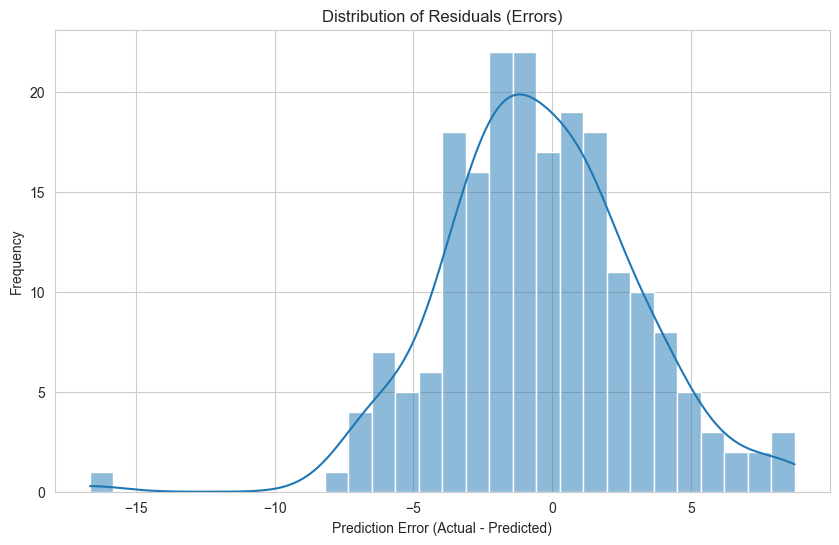

Saved 'eval_residuals_distribution.png'

Step 8: Saving Model
Model pipeline saved successfully as 'manufacturing_output_model.pkl'

--- Project Execution Complete ---


<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report 
import joblib
import warnings

warnings.filterwarnings('ignore')

# --- 1. Data Loading & Initial Exploration ---

print("Step 1: Data Loading")
try:
    # Use the correct filename as per your notebook's Cell 2
    df = pd.read_csv('manufacturing_dataset_1000_samples.csv')
    print("Dataset loaded successfully.")
    print(f"Shape of data: {df.shape}")
except FileNotFoundError:
    print("Error: 'manufacturing_dataset_1000_samples.csv' not found.")
    print("Please make sure the dataset file is in the same directory.")
    exit()

print("\nStep 2: Data Exploration & Understanding")
print("Data Info:")
df.info()

print("\nStatistical Summary (Numerical Features):")
print(df.describe())

# Check for missing values 
print(f"\nMissing values per column:\n{df.isnull().sum()}")

# --- 3. Exploratory Data Analysis (EDA) ---

print("\nStep 3: Exploratory Data Analysis (EDA)")

# Set up visualization style
sns.set_style("whitegrid")

# 1. Distribution of the Target Variable (Parts_Per_Hour)
plt.figure(figsize=(10, 6))
sns.histplot(df['Parts_Per_Hour'], kde=True, bins=30)
plt.title('Distribution of Target Variable (Parts_Per_Hour)')
plt.xlabel('Parts Per Hour')
plt.ylabel('Frequency')
plt.savefig('eda_target_distribution.png')
plt.show()
print("Saved 'eda_target_distribution.png'")

# 2. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(18, 12))
# Calculate correlation, dropping non-numeric cols for this plot
numeric_cols_target = df.select_dtypes(include=np.number).columns # Keep target here
corr_matrix = df[numeric_cols_target].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numerical Features (Including Target)')
plt.tight_layout()
plt.show()
plt.savefig('eda_correlation_heatmap.png')
print("Saved 'eda_correlation_heatmap.png'")

# 3. Categorical Feature Analysis
plt.figure(figsize=(12, 7))
sns.boxplot(x='Material_Grade', y='Parts_Per_Hour', data=df)
plt.title('Parts Per Hour by Material Grade')
plt.show()
plt.savefig('eda_boxplot_material_grade.png')
print("Saved 'eda_boxplot_material_grade.png'")

plt.figure(figsize=(12, 7))
sns.boxplot(x='Shift', y='Parts_Per_Hour', data=df)
plt.title('Parts Per Hour by Shift')
plt.show()
plt.savefig('eda_boxplot_shift.png')
print("Saved 'eda_boxplot_shift.png'")

print("EDA visualizations saved to disk.")

# --- 4. Data Preprocessing & Feature Engineering ---

print("\nStep 4: Preprocessing & Feature Definition")

# Define Target Variable (y) and Features (X)
target = 'Parts_Per_Hour'
y = df[target]
# Drop 'Timestamp' as per your notebook's Cell 3
X = df.drop([target, 'Timestamp'], axis=1)

# Identify numerical and categorical features (same as before)
categorical_features = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']
numerical_features = [col for col in X.columns if col not in categorical_features]

print(f"Target variable: {target}")
print(f"Total features: {len(X.columns)}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

# Create preprocessing pipelines 
# 1. For numerical features: Impute NaNs with median, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# 2. For categorical features: Impute NaNs with 'missing', then OneHotEncode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])

# Combine pipelines using ColumnTransformer (unchanged)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any (shouldn't be any here)
)

# --- 5. Train-Test Split ---

print("\nStep 5: Train-Test Split")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# --- 6. Model Building & Training ---

print("\nStep 6: Model Building & Training")

# Create the full pipeline: Preprocessing + Linear Regression Model (unchanged)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model (Now it should work without the NaN error)
print("Training the Linear Regression model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

# --- 7. Model Evaluation ---

print("\nStep 7: Model Evaluation")
# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# --- 7a. Regression Metrics (Correct for this task) ---
print("\n7a. Regression Performance Metrics")
print("These metrics directly evaluate how close the predicted number is to the actual number.")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"  Mean Squared Error (MSE):      {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE):{rmse:.4f}")
print(f"  Mean Absolute Error (MAE):     {mae:.4f}")
print(f"  R-squared (R²):                {r2:.4f}")
print(f"\nInterpretation:")
print(f"R-squared (R²): The model explains {r2*100:.2f}% of the variance in 'Parts_Per_Hour'. (Higher is better, 1.0 is perfect)")
print(f"RMSE: On average, the model's prediction error is about {rmse:.2f} parts per hour. (Lower is better)")

# --- 7b. Visual Evaluation ---
print("7b. Visual Evaluation")
# 1. Actual vs. Predicted (Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Values (Regression Performance)')
plt.xlabel('Actual Parts Per Hour')
plt.ylabel('Predicted Parts Per Hour')
plt.show()
plt.savefig('eval_actual_vs_predicted.png')
print("Saved 'eval_actual_vs_predicted.png'")

# 2. Residuals Plot (Regression)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()
plt.savefig('eval_residuals_distribution.png')
print("Saved 'eval_residuals_distribution.png'")

# --- 8. Save the Model ---
print("\nStep 8: Saving Model")
model_filename = 'manufacturing_output_model.pkl'
joblib.dump(model_pipeline, model_filename)
print(f"Model pipeline saved successfully as '{model_filename}'")

print("\n--- Project Execution Complete ---")

In [7]:
# --- Model Interpretation ---
print("\n--- [Step X: Model Interpretation / Feature Importance] ---")

# Ensure the model pipeline is trained before running this
model_pipeline = joblib.load('manufacturing_output_model.pkl') 

try:
    # Get feature names after One-Hot Encoding from the preprocessor step
    preprocessor = model_pipeline.named_steps['preprocessor']
    ohe_transformer = preprocessor.named_transformers_['cat']
    ohe_feature_names = ohe_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)

    # Combine numerical and OHE feature names in the correct order
    # Important: This assumes the ColumnTransformer structure ('num' first, then 'cat')
    final_feature_names = numerical_features + list(ohe_feature_names)

    # Get coefficients from the regression step
    coefficients = model_pipeline.named_steps['regressor'].coef_

    # Check if the number of names matches the coefficients
    if len(final_feature_names) != len(coefficients):
        print(f"Warning: Mismatch between feature names ({len(final_feature_names)}) and coefficients ({len(coefficients)}).")
        # Fallback or error handling needed here if mismatch occurs
    else:
        # Create a DataFrame for easy analysis
        coef_df = pd.DataFrame({
            'Feature': final_feature_names,
            'Coefficient': coefficients
        })

        # Calculate absolute coefficients for ranking importance regardless of sign
        coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()

        # Sort by absolute coefficient to find most influential features
        coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

        # Display top N influential features
        N = 10
        print(f"\nTop {N} Most Influential Features (by Absolute Coefficient):")
        print("NOTE: Positive coefficient suggests increase in output, Negative suggests decrease.")
        print(coef_df_sorted[['Feature', 'Coefficient']].head(N).to_string(index=False))

        # Optionally, display least influential features
        print(f"\nLeast {N} Influential Features (by Absolute Coefficient):")
        print(coef_df_sorted[['Feature', 'Coefficient']].tail(N).to_string(index=False))

except Exception as e:
    print(f"Error during feature importance extraction: {e}")
    print("Ensure the pipeline structure and step names ('preprocessor', 'cat', 'onehot', 'regressor') are correct.")


--- [Step X: Model Interpretation / Feature Importance] ---

Top 10 Most Influential Features (by Absolute Coefficient):
NOTE: Positive coefficient suggests increase in output, Negative suggests decrease.
               Feature  Coefficient
      Total_Cycle_Time   -10.047416
      Efficiency_Score     2.876391
          Cooling_Time     2.666301
 Injection_Temperature     2.296038
           Machine_Age    -2.201767
   Machine_Type_Type_A     2.115238
           Shift_Night    -2.062230
             Shift_Day     1.902766
   Machine_Type_Type_C    -1.806574
Material_Grade_Economy    -1.586562

Least 10 Influential Features (by Absolute Coefficient):
                Feature  Coefficient
    Machine_Utilization    -0.402616
    Machine_Type_Type_B    -0.308664
   Day_of_Week_Thursday     0.257374
          Shift_Evening     0.159465
    Ambient_Temperature    -0.122383
   Day_of_Week_Saturday    -0.116357
      Maintenance_Hours    -0.071341
    Day_of_Week_Tuesday     0.064913
Materia

--- [Step 1: Data Loading] ---
Dataset loaded successfully.
Shape of data: (1000, 19)

--- [Step 2: Data Exploration & Understanding] ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Ty

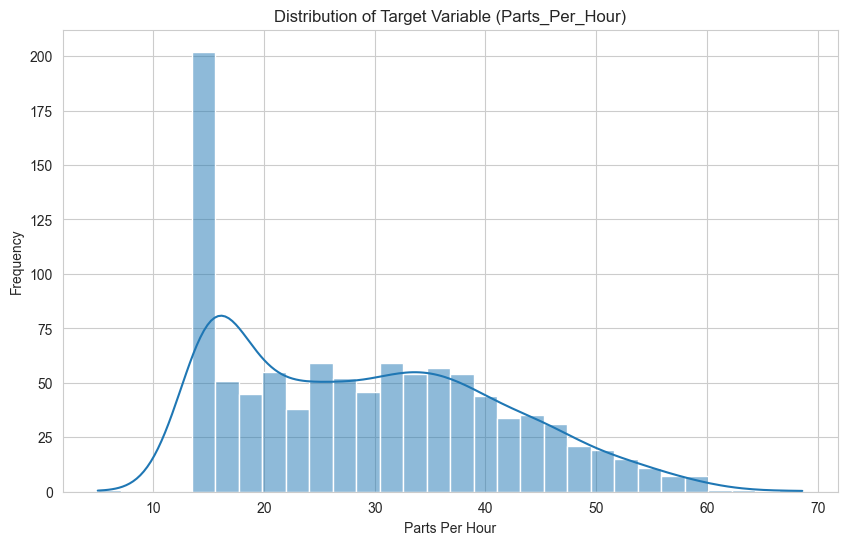

Saved 'eda_target_distribution.png'


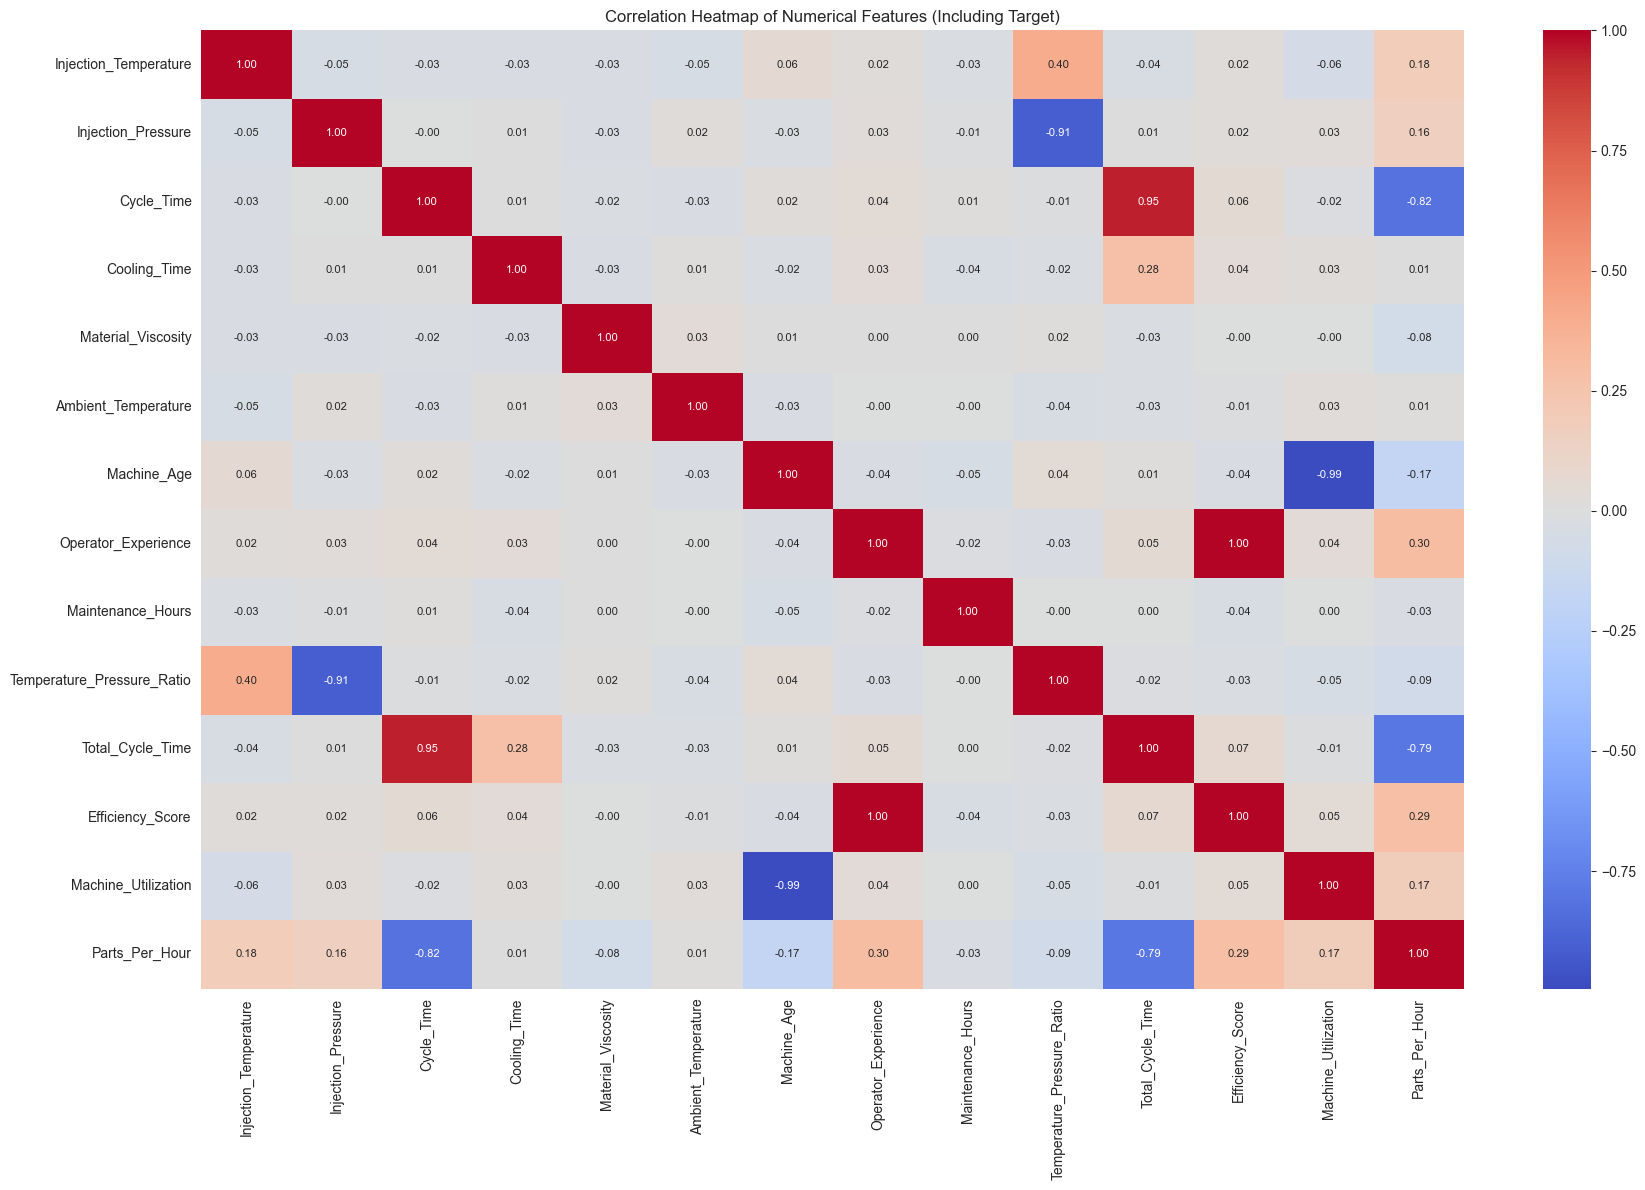

Saved 'eda_correlation_heatmap.png'


<Figure size 640x480 with 0 Axes>

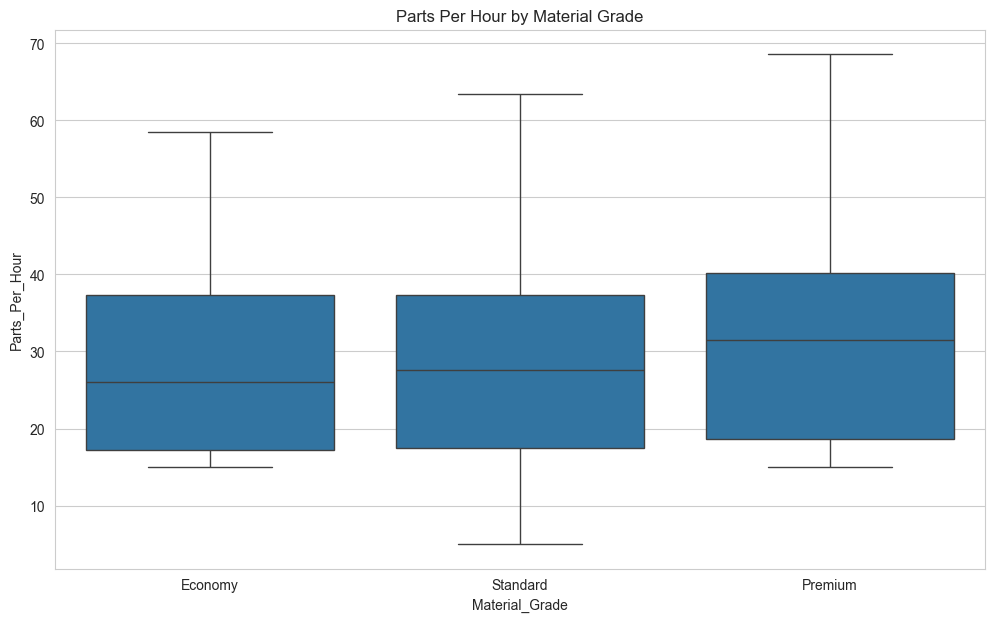

Saved 'eda_boxplot_material_grade.png'


<Figure size 640x480 with 0 Axes>

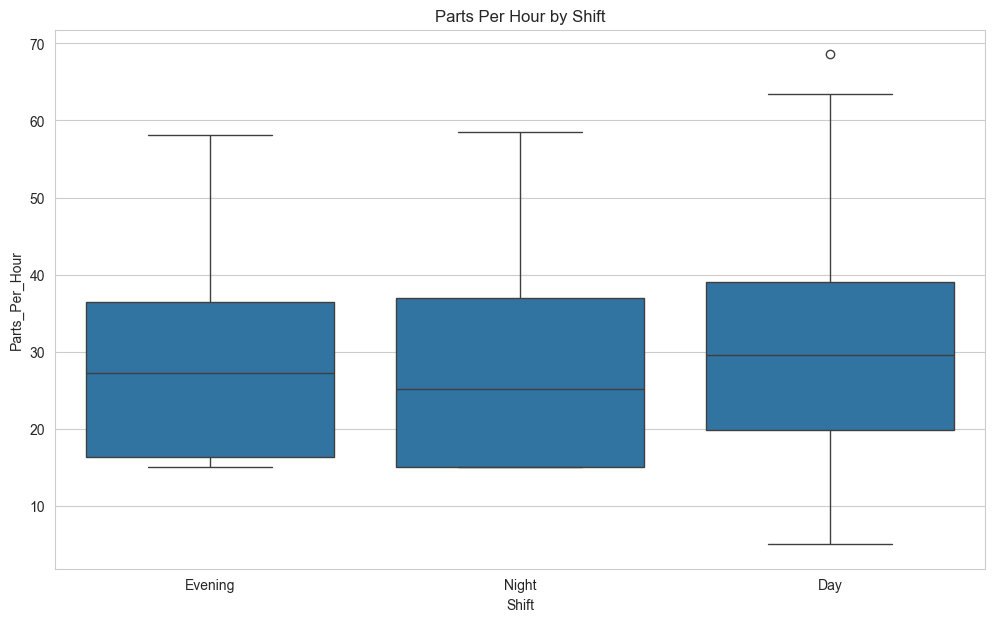

Saved 'eda_boxplot_shift.png'
EDA visualizations displayed and saved to disk.

--- [Step 4: Preprocessing & Feature Definition] ---
Dropped Timestamp column.

Defining Preprocessing Steps...
  Target variable: Parts_Per_Hour
  Numerical features (13): ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature', 'Machine_Age', 'Operator_Experience', 'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score', 'Machine_Utilization']
  Categorical features (4): ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']
Standard preprocessing pipeline defined.
Preprocessing pipeline with Polynomial Features defined.

--- [Step 5: Train-Test Split] ---
Training set size: 800, Test set size: 200

--- [Step 6: Model Building & Training] ---

Training Linear Regression model (Standard Features)...
Linear Regression training complete.

Training RidgeCV model (Polynomial Features)...
RidgeCV (Poly) traini

<Figure size 640x480 with 0 Axes>

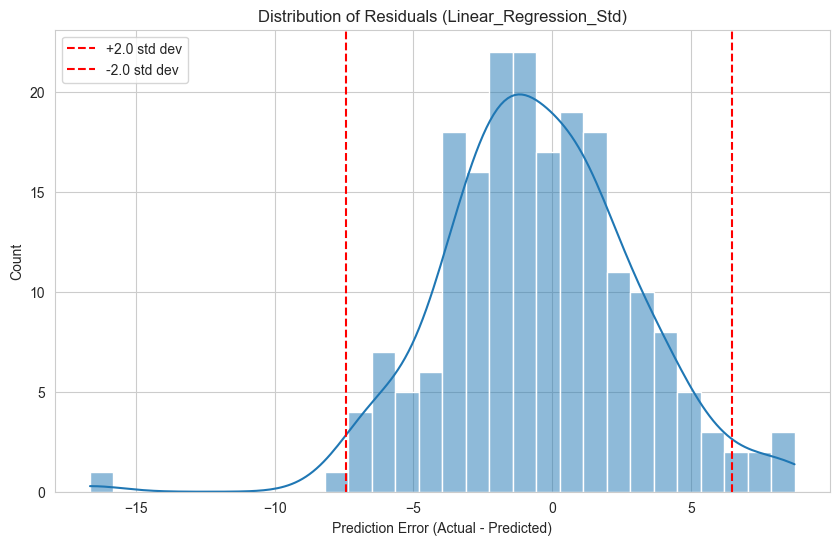

  Saved Residuals plot: 'eval_residuals_Linear_Regression_Std.png'

--- Residual Analysis for RidgeCV_Poly ---
  Residuals Mean: -0.5428, Std Dev: 2.9435
  Identifying anomalies with absolute error > 5.8869 (2.0 std dev)
  Found 6 potential anomalies.
  Anomalous Predictions:
     Actual  Predicted  Residual_Error
136    24.2  31.731178       -7.531178
76     34.4  27.012314        7.387686
998    57.7  70.802180      -13.102180
554    15.0   7.915818        7.084182
583    54.3  48.233163        6.066837


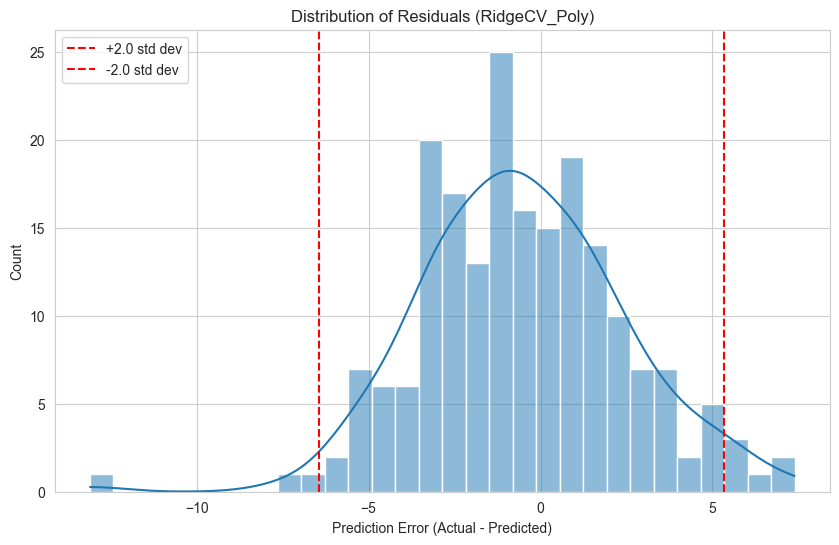

  Saved Residuals plot: 'eval_residuals_RidgeCV_Poly.png'

--- Residual Analysis for LassoCV_Poly ---
  Residuals Mean: -0.5885, Std Dev: 3.1544
  Identifying anomalies with absolute error > 6.3087 (2.0 std dev)
  Found 6 potential anomalies.
  Anomalous Predictions:
     Actual  Predicted  Residual_Error
136    24.2  31.998216       -7.798216
76     34.4  27.001039        7.398961
998    57.7  77.125353      -19.425353
554    15.0   7.587594        7.412406
583    54.3  47.962991        6.337009


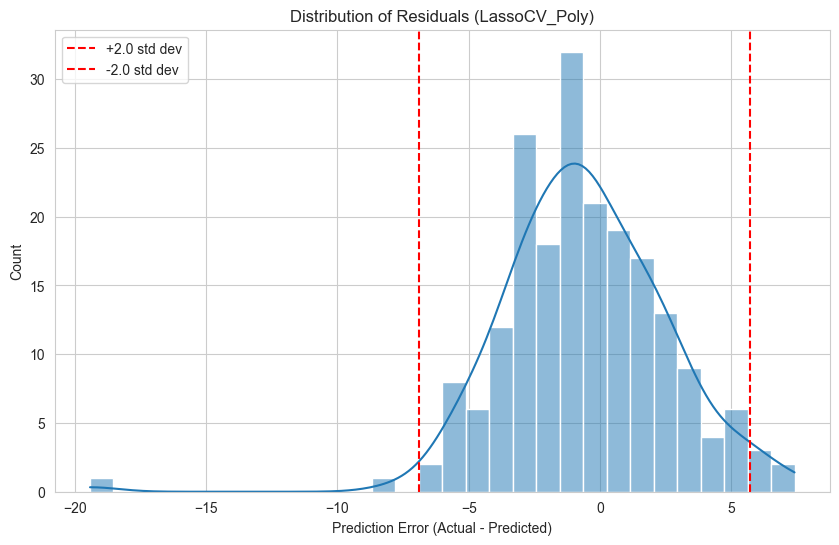

  Saved Residuals plot: 'eval_residuals_LassoCV_Poly.png'

--- [Step 10: Saving Models] ---
All three model pipelines (LR-Std, Ridge-Poly, Lasso-Poly) saved successfully.

--- Project Execution Complete ---


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures # Added PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings

warnings.filterwarnings('ignore')

# --- 1. Data Loading & Initial Exploration ---
print("--- [Step 1: Data Loading] ---")
try:
    df = pd.read_csv('manufacturing_dataset_1000_samples.csv')
    print("Dataset loaded successfully.")
    print(f"Shape of data: {df.shape}")
except FileNotFoundError:
    print("Error: 'manufacturing_dataset_1000_samples.csv' not found.")
    exit()

# --- 2. Data Exploration ---
print("\n--- [Step 2: Data Exploration & Understanding] ---")
df.info()
print("\nStatistical Summary (Numerical Features):")
print(df.describe())
print(f"\nMissing values per column:\n{df.isnull().sum()}")

# --- 3. EDA ---
print("\n--- [Step 3: Exploratory Data Analysis (EDA)] ---")
sns.set_style("whitegrid")
# 1. Distribution of the Target Variable (Parts_Per_Hour)
plt.figure(figsize=(10, 6))
sns.histplot(df['Parts_Per_Hour'], kde=True, bins=30)
plt.title('Distribution of Target Variable (Parts_Per_Hour)')
plt.xlabel('Parts Per Hour')
plt.ylabel('Frequency')
plt.savefig('eda_target_distribution.png')
plt.show()
print("Saved 'eda_target_distribution.png'")

# 2. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(18, 12))
# Calculate correlation, dropping non-numeric cols for this plot
numeric_cols_target = df.select_dtypes(include=np.number).columns # Keep target here
corr_matrix = df[numeric_cols_target].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numerical Features (Including Target)')
plt.tight_layout()
plt.show()
plt.savefig('eda_correlation_heatmap.png')
print("Saved 'eda_correlation_heatmap.png'")

# 3. Categorical Feature Analysis
plt.figure(figsize=(12, 7))
sns.boxplot(x='Material_Grade', y='Parts_Per_Hour', data=df)
plt.title('Parts Per Hour by Material Grade')
plt.show()
plt.savefig('eda_boxplot_material_grade.png')
print("Saved 'eda_boxplot_material_grade.png'")

plt.figure(figsize=(12, 7))
sns.boxplot(x='Shift', y='Parts_Per_Hour', data=df)
plt.title('Parts Per Hour by Shift')
plt.show()
plt.savefig('eda_boxplot_shift.png')
print("Saved 'eda_boxplot_shift.png'")

print("EDA visualizations displayed and saved to disk.")


# --- 4. Preprocessing & Feature Definition (Timestamp Dropped) ---
print("\n--- [Step 4: Preprocessing & Feature Definition] ---")
target = 'Parts_Per_Hour'
y = df[target]

# --- MODIFICATION: Drop Timestamp, DO NOT engineer 'Hour' ---
X = df.drop([target, 'Timestamp'], axis=1)
print("Dropped Timestamp column.")
# -------------------------------------------------------------

# Define Feature Lists (without 'Hour')
categorical_features = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']
numerical_features = [col for col in X.columns if col not in categorical_features] # 'Hour' is NOT included

print("\nDefining Preprocessing Steps...")
print(f"  Target variable: {target}")
print(f"  Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"  Categorical features ({len(categorical_features)}): {categorical_features}")

# == Preprocessor 1: Standard (for Linear Regression) ==
numeric_transformer_std = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer_std = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
preprocessor_std = ColumnTransformer(transformers=[
    ('num', numeric_transformer_std, numerical_features),
    ('cat', categorical_transformer_std, categorical_features)],
    remainder='passthrough')
print("Standard preprocessing pipeline defined.")

# == Preprocessor 2: With Polynomial Features (for Ridge/Lasso) ==
numeric_transformer_poly = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # Add Polynomial Features
    ('scaler', StandardScaler())])
categorical_transformer_poly = Pipeline(steps=[ # Identical to std categorical
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
preprocessor_poly = ColumnTransformer(transformers=[
    ('num', numeric_transformer_poly, numerical_features), # Uses original numerical list
    ('cat', categorical_transformer_poly, categorical_features)],
    remainder='passthrough')
print("Preprocessing pipeline with Polynomial Features defined.")


# --- 5. Train-Test Split ---
print("\n--- [Step 5: Train-Test Split] ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


# --- 6. Model Building & Training ---
print("\n--- [Step 6: Model Building & Training] ---")

# == Model 1: Linear Regression (using STANDARD preprocessor) ==
print("\nTraining Linear Regression model (Standard Features)...")
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', LinearRegression())])
pipeline_lr.fit(X_train, y_train)
print("Linear Regression training complete.")

# == Model 2: RidgeCV Regression (using POLY preprocessor) ==
print("\nTraining RidgeCV model (Polynomial Features)...")
alphas_ridge = np.logspace(-2, 4, 7)
pipeline_ridge_poly = Pipeline(steps=[('preprocessor', preprocessor_poly), ('regressor', RidgeCV(alphas=alphas_ridge))])
pipeline_ridge_poly.fit(X_train, y_train)
best_alpha_ridge_poly = pipeline_ridge_poly.named_steps['regressor'].alpha_
print(f"RidgeCV (Poly) training complete. Best alpha: {best_alpha_ridge_poly:.4f} ✨")

# == Model 3: LassoCV Regression (using POLY preprocessor) ==
print("\nTraining LassoCV model (Polynomial Features)...")
alphas_lasso = np.logspace(-5, -1, 10)
pipeline_lasso_poly = Pipeline(steps=[('preprocessor', preprocessor_poly), ('regressor', LassoCV(alphas=alphas_lasso, cv=5, random_state=42, max_iter=20000))])
pipeline_lasso_poly.fit(X_train, y_train)
best_alpha_lasso_poly = pipeline_lasso_poly.named_steps['regressor'].alpha_
print(f"LassoCV (Poly) training complete. Best alpha: {best_alpha_lasso_poly:.5f} ✨")


# --- 7. Model Evaluation & Comparison ---
print("\n--- [Step 7: Model Evaluation & Comparison] ---")
y_pred_lr = pipeline_lr.predict(X_test) # Predict with LR standard
y_pred_ridge_poly = pipeline_ridge_poly.predict(X_test) # Predict with Ridge poly
y_pred_lasso_poly = pipeline_lasso_poly.predict(X_test) # Predict with Lasso poly

# (evaluate_model function remains the same)
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n--- {model_name} Performance ---")
    print(f"  R-squared (R²): {r2:.4f}")
    print(f"  RMSE:           {rmse:.4f}")
    print(f"  MAE:            {mae:.4f}")
    print(f"  MSE:            {mse:.4f}")
    return {'Model': model_name, 'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

results = []
results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression (Std Feats)"))
results.append(evaluate_model(y_test, y_pred_ridge_poly, f"RidgeCV (Poly Feats, alpha={best_alpha_ridge_poly:.4f})"))
results.append(evaluate_model(y_test, y_pred_lasso_poly, f"LassoCV (Poly Feats, alpha={best_alpha_lasso_poly:.5f})"))

print("\n--- Performance Comparison ---")
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False, float_format="%.4f"))


# --- 8. Feature Importance & Selection Insights ---
print("\n--- [Step 8: Feature Importance & Selection Comparison] ---")

try:
    # --- Importance for Linear Regression (Standard Features) ---
    lr_preprocessor = pipeline_lr.named_steps['preprocessor']
    lr_ohe_transformer = lr_preprocessor.named_transformers_['cat']
    lr_ohe_feature_names = lr_ohe_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)
    lr_final_feature_names = numerical_features + list(lr_ohe_feature_names) # Uses original numerical list
    coefficients_lr = pipeline_lr.named_steps['regressor'].coef_

    coef_lr_df = pd.DataFrame({'Feature': lr_final_feature_names, 'LR_Coefficient': coefficients_lr})
    coef_lr_df['Abs_LR_Coeff'] = coef_lr_df['LR_Coefficient'].abs()
    coef_lr_df_sorted = coef_lr_df.sort_values(by='Abs_LR_Coeff', ascending=False)

    N = 5
    print(f"\nTop {N} Most Influential Features for Linear Regression (Standard Features):")
    print(coef_lr_df_sorted[['Feature', 'LR_Coefficient']].head(N).to_string(index=False, float_format="%.4f"))

    # --- Importance/Selection for Lasso (Polynomial Features) ---
    lasso_poly_preprocessor = pipeline_lasso_poly.named_steps['preprocessor']
    poly_feature_step = lasso_poly_preprocessor.named_transformers_['num'].named_steps['poly']
    poly_num_feature_names = poly_feature_step.get_feature_names_out(numerical_features) # Uses original numerical list
    lasso_poly_ohe_transformer = lasso_poly_preprocessor.named_transformers_['cat']
    lasso_poly_ohe_feature_names = lasso_poly_ohe_transformer.named_steps['onehot'].get_feature_names_out(categorical_features)
    lasso_poly_final_feature_names = list(poly_num_feature_names) + list(lasso_poly_ohe_feature_names)
    num_total_poly_features = len(lasso_poly_final_feature_names)

    coefficients_lasso_poly = pipeline_lasso_poly.named_steps['regressor'].coef_
    num_zero_coeffs_lasso_poly = np.sum(coefficients_lasso_poly == 0)

    print(f"\nLassoCV (Polynomial Features) Feature Selection:")
    print(f"  Set {num_zero_coeffs_lasso_poly} out of {num_total_poly_features} coefficients to zero.")

    non_zero_poly_coeffs_df = pd.DataFrame({
        'Feature': lasso_poly_final_feature_names,
        'Lasso_Poly_Coefficient': coefficients_lasso_poly
    })
    print("\n  Top 10 Features Retained by Lasso (Poly - Ranked by Absolute Coefficient):")
    non_zero_poly_coeffs_df['Abs_Coeff'] = non_zero_poly_coeffs_df['Lasso_Poly_Coefficient'].abs()
    print(non_zero_poly_coeffs_df[non_zero_poly_coeffs_df['Lasso_Poly_Coefficient'] != 0].sort_values('Abs_Coeff', ascending=False).head(10)[['Feature', 'Lasso_Poly_Coefficient']].to_string(index=False, float_format="%.4f"))

except Exception as e:
    print(f"\nError during feature importance extraction: {e}")


# --- 9. Residual Analysis (All Models) ---
print("\n--- [Step 9: Residual Analysis (All Models) ---")
# (analyze_residuals function remains the same)
def analyze_residuals(y_true, y_pred, model_name, threshold_std=2):
    # ... (function code as before) ...
    residuals = y_true - y_pred
    mean_resid = np.mean(residuals)
    std_resid = np.std(residuals)
    threshold = threshold_std * std_resid

    print(f"\n--- Residual Analysis for {model_name} ---")
    print(f"  Residuals Mean: {mean_resid:.4f}, Std Dev: {std_resid:.4f}")
    print(f"  Identifying anomalies with absolute error > {threshold:.4f} ({threshold_std:.1f} std dev)")

    anomaly_indices = residuals[np.abs(residuals) > threshold].index

    if not anomaly_indices.empty:
        print(f"  Found {len(anomaly_indices)} potential anomalies.")
        anomaly_df = pd.DataFrame({
            'Actual': y_true.loc[anomaly_indices],
            'Predicted': y_pred[y_true.index.isin(anomaly_indices)],
            'Residual_Error': residuals.loc[anomaly_indices]
        })
        print("  Anomalous Predictions:")
        print(anomaly_df.head())
    else:
        print("  No significant anomalies found based on the threshold.")

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Distribution of Residuals ({model_name})')
    plt.xlabel('Prediction Error (Actual - Predicted)')
    plt.axvline(mean_resid + threshold, color='r', linestyle='--', label=f'+{threshold_std:.1f} std dev')
    plt.axvline(mean_resid - threshold, color='r', linestyle='--', label=f'-{threshold_std:.1f} std dev')
    plt.legend()
    plt.show() # Display plot
    filename = f'eval_residuals_{model_name.replace(" ", "_").split("(")[0]}.png'
    plt.savefig(filename)
    print(f"  Saved Residuals plot: '{filename}'")
    plt.close()


analyze_residuals(y_test, y_pred_lr, "Linear_Regression_Std", threshold_std=2)
analyze_residuals(y_test, y_pred_ridge_poly, "RidgeCV_Poly", threshold_std=2)
analyze_residuals(y_test, y_pred_lasso_poly, "LassoCV_Poly", threshold_std=2)


# --- 10. Save Models ---
print("\n--- [Step 10: Saving Models] ---")
joblib.dump(pipeline_lr, 'manufacturing_lr_model_std.pkl') # LR uses std preprocessor
joblib.dump(pipeline_ridge_poly, 'manufacturing_ridgecv_model_poly.pkl') # Ridge uses poly
joblib.dump(pipeline_lasso_poly, 'manufacturing_lassocv_model_poly.pkl') # Lasso uses poly
print("All three model pipelines (LR-Std, Ridge-Poly, Lasso-Poly) saved successfully.")

print("\n--- Project Execution Complete ---")